In [1]:
import torch
import sklearn
import pandas as pd
import torch.nn as nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#data   #making circle
n_samples=1000

X, y= make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
X[:10],y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [5]:
circles=pd.DataFrame({
    "X": X[:, 0],
    "X2": X[:, 1],
    "labels": y})

In [6]:
circles.head(10)

,X,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
X.shape, y.shape

((1000, 2), (1000,))

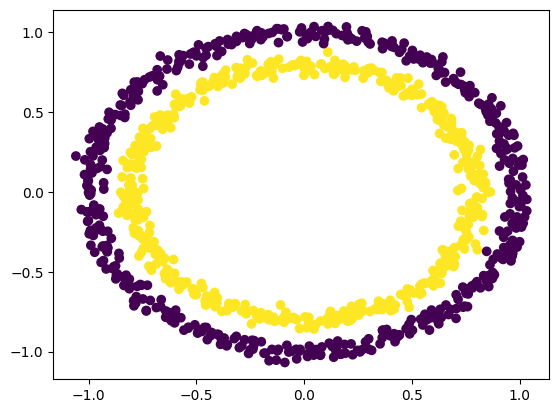

In [8]:
plt.scatter(x=X[:, 0], y=X[:, 1],c=y)

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [11]:
# turning it to tensors

In [12]:
type(X)

numpy.ndarray

In [13]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [14]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [15]:
X[:10]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967],
        [-0.4796,  0.6764],
        [-0.0136,  0.8033],
        [ 0.7715,  0.1478],
        [-0.1693, -0.7935],
        [-0.1215,  1.0215]])

In [16]:
y[:10]

tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.])

In [17]:
#using train test split of sklearn to splitthe data

In [18]:
torch.manual_seed(42)

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train[:10],X_test[:10], y_train[:10], y_test[:10]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994],
         [-0.8837, -0.4678],
         [-0.3836,  0.6987],
         [ 0.6047,  0.5163],
         [-0.5869,  0.7804],
         [ 0.8833, -0.5178]]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [21]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [22]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [23]:
X_train.shape

torch.Size([800, 2])

In [24]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [25]:
#Model phsae

In [26]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(in_features=2, out_features=5)
        self.layer2=nn.Linear(in_features=5, out_features=1) 
    def forward(self,x):
        return self.layer1(self.layer2(x))

In [27]:
model_CR=CircleModel()
model_CR

CircleModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [28]:
model_CR.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('layer1.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('layer2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('layer2.bias', tensor([-0.2060]))])

In [29]:
#  CircleModel with nn.Sequential
model_CR=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1))
model_CR

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [30]:
#predictions with the model
untrained_preds = model_CR(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])


In [31]:
untrained_preds[:10]

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], grad_fn=<SliceBackward0>)

In [32]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [33]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_CR.parameters(), lr=0.01)

In [34]:
#Acccuracy
def accuracy_fn(y_true, y_pred):
    correct=torch.eq(y_true, y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

In [35]:
y_logits = model_CR(X_test[:5])
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], grad_fn=<AddmmBackward0>)

In [36]:
y_pred_sigmoid=torch.sigmoid(y_logits)
y_pred_sigmoid

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], grad_fn=<SigmoidBackward0>)

In [37]:
y_preds = torch.round(y_pred_sigmoid)
y_pred_labels = torch.round(torch.sigmoid(model_CR(X_test[:5])))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.], grad_fn=<SqueezeBackward0>)

In [38]:
#Building training loop

In [39]:
loss_fn

BCEWithLogitsLoss()

In [40]:
torch.manual_seed(42)
epochs = 200

for epoch in range(epochs):
    model_CR.train()
    
    y_logits = model_CR(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
  
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred) 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_CR.eval()
    with torch.inference_mode():
        test_logits = model_CR(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69796, Accuracy: 51.88% | Test loss: 0.69460, Test acc: 57.50%
Epoch: 10 | Loss: 0.69768, Accuracy: 52.00% | Test loss: 0.69438, Test acc: 58.00%
Epoch: 20 | Loss: 0.69742, Accuracy: 52.00% | Test loss: 0.69418, Test acc: 57.50%
Epoch: 30 | Loss: 0.69717, Accuracy: 52.00% | Test loss: 0.69401, Test acc: 56.50%
Epoch: 40 | Loss: 0.69695, Accuracy: 51.62% | Test loss: 0.69385, Test acc: 56.50%
Epoch: 50 | Loss: 0.69675, Accuracy: 51.38% | Test loss: 0.69370, Test acc: 56.00%
Epoch: 60 | Loss: 0.69656, Accuracy: 51.38% | Test loss: 0.69357, Test acc: 56.00%
Epoch: 70 | Loss: 0.69638, Accuracy: 51.38% | Test loss: 0.69345, Test acc: 56.50%
Epoch: 80 | Loss: 0.69621, Accuracy: 51.25% | Test loss: 0.69334, Test acc: 56.50%
Epoch: 90 | Loss: 0.69606, Accuracy: 51.38% | Test loss: 0.69324, Test acc: 55.00%
Epoch: 100 | Loss: 0.69592, Accuracy: 51.12% | Test loss: 0.69315, Test acc: 54.00%
Epoch: 110 | Loss: 0.69579, Accuracy: 51.00% | Test loss: 0.69306, Test acc: 53.00%
Epo

In [41]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


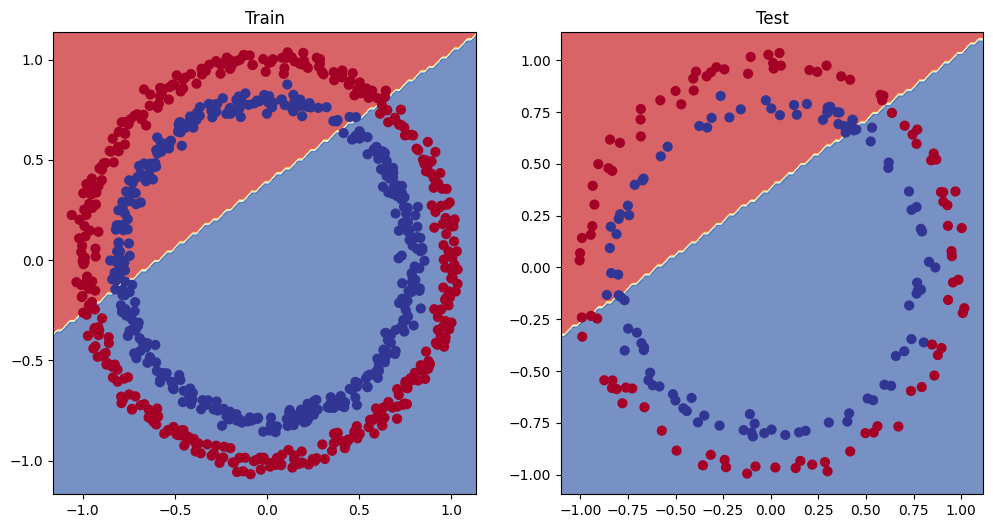

In [42]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_CR, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_CR, X_test, y_test)

In [43]:
model_CR.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0842, -0.2840],
                      [ 0.4637, -0.5447],
                      [-0.3267, -0.1979],
                      [-0.4230,  0.0615],
                      [-0.7005,  0.6438]])),
             ('0.bias', tensor([-0.6038,  0.5324,  0.1158, -0.2243,  0.4318])),
             ('1.weight',
              tensor([[ 0.0837,  0.3099,  0.0414, -0.1225,  0.1399]])),
             ('1.bias', tensor([-0.1615]))])

In [44]:
#Improving the model

In [45]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2, out_features=10)
        self.layer_2=nn.Linear(in_features=10, out_features=10)
        self.layer_3=nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [46]:
model_CR1 = CircleModelV1()
model_CR1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [47]:
#Loss function and optimizer

In [48]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_CR1.parameters(), lr=0.01)

In [49]:
#Training Loop

In [50]:
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
    y_logits=model_CR1(X_train).squeeze()
    y_preds=torch.round(torch.sigmoid(y_logits))

    loss=loss_fn(y_logits, y_train)
    acc=accuracy_fn(y_true=y_train, y_pred=y_preds)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_CR1.eval()

    #Testing
    model_CR1.eval()
    with torch.inference_mode():
        test_logits=model_CR1(X_test).squeeze() 
        test_pred=torch.round(torch.sigmoid(test_logits))
        
        #Accuracy
        test_loss=loss_fn(test_logits, y_test)
        test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

    #Printing each 100th epoch
    if epoch % 10==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 10 | Loss: 0.69392, Accuracy: 50.50% | Test loss: 0.69262, Test acc: 51.00%
Epoch: 20 | Loss: 0.69389, Accuracy: 50.62% | Test loss: 0.69262, Test acc: 50.50%
Epoch: 30 | Loss: 0.69386, Accuracy: 50.62% | Test loss: 0.69263, Test acc: 50.50%
Epoch: 40 | Loss: 0.69383, Accuracy: 50.62% | Test loss: 0.69264, Test acc: 50.50%
Epoch: 50 | Loss: 0.69381, Accuracy: 50.75% | Test loss: 0.69264, Test acc: 50.50%
Epoch: 60 | Loss: 0.69378, Accuracy: 50.62% | Test loss: 0.69265, Test acc: 51.00%
Epoch: 70 | Loss: 0.69376, Accuracy: 50.25% | Test loss: 0.69266, Test acc: 51.00%
Epoch: 80 | Loss: 0.69373, Accuracy: 50.00% | Test loss: 0.69267, Test acc: 50.50%
Epoch: 90 | Loss: 0.69371, Accuracy: 49.88% | Test loss: 0.69268, Test acc: 50.50%


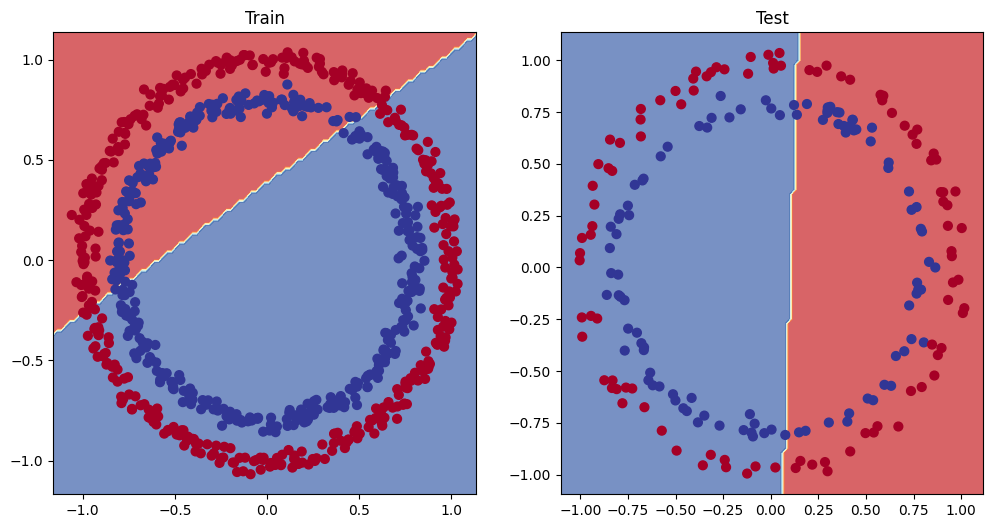

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_CR, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_CR1, X_test, y_test)

In [52]:
model_CR1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5402,  0.5867],
                      [-0.1651,  0.6498],
                      [-0.1553,  0.1425],
                      [-0.3446,  0.4151],
                      [ 0.6225, -0.5191],
                      [ 0.6152,  0.1326],
                      [ 0.5220,  0.0956],
                      [ 0.3405, -0.1000],
                      [ 0.5434,  0.1038],
                      [-0.3315,  0.1796]])),
             ('layer_1.bias',
              tensor([-0.3257, -0.0831, -0.2871,  0.4692, -0.5579, -0.3262, -0.1996, -0.4250,
                       0.0672, -0.6980])),
             ('layer_2.weight',
              tensor([[ 0.2869, -0.2684,  0.2441,  0.0522, -0.1019,  0.1965,  0.0502,  0.2561,
                        0.0354, -0.0998],
                      [ 0.0823, -0.0862,  0.1331,  0.2832,  0.1811, -0.1406,  0.1807,  0.0553,
                        0.1589, -0.1926],
                      [-0.3106, -0.1218, -0.2426,  0.2587,  0.0926,  0.1

In [53]:
#Can it work for the Straight line or not

In [54]:
weight = 0.7
bias = 0.3

X_regression = torch.arange(0, 1, 0.005).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
print(len(y_regression))
X_regression[:5], y_regression[:5]

200
200


(tensor([[0.0000],
         [0.0050],
         [0.0100],
         [0.0150],
         [0.0200]]),
 tensor([[0.3000],
         [0.3035],
         [0.3070],
         [0.3105],
         [0.3140]]))

In [55]:
X_train_regression,X_test_regression, y_train_regression,y_test_regression=train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

print(len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression))

160 160 40 40


In [56]:
X_train_regression[:10],y_train_regression[:10], X_test_regression[:10],y_test_regression[:10]

(tensor([[0.3950],
         [0.9850],
         [0.1900],
         [0.1200],
         [0.6100],
         [0.9750],
         [0.1450],
         [0.0950],
         [0.7150],
         [0.4300]]),
 tensor([[0.5765],
         [0.9895],
         [0.4330],
         [0.3840],
         [0.7270],
         [0.9825],
         [0.4015],
         [0.3665],
         [0.8005],
         [0.6010]]),
 tensor([[0.4750],
         [0.0750],
         [0.1500],
         [0.7900],
         [0.6400],
         [0.5750],
         [0.3450],
         [0.8500],
         [0.8700],
         [0.2250]]),
 tensor([[0.6325],
         [0.3525],
         [0.4050],
         [0.8530],
         [0.7480],
         [0.7025],
         [0.5415],
         [0.8950],
         [0.9090],
         [0.4575]]))

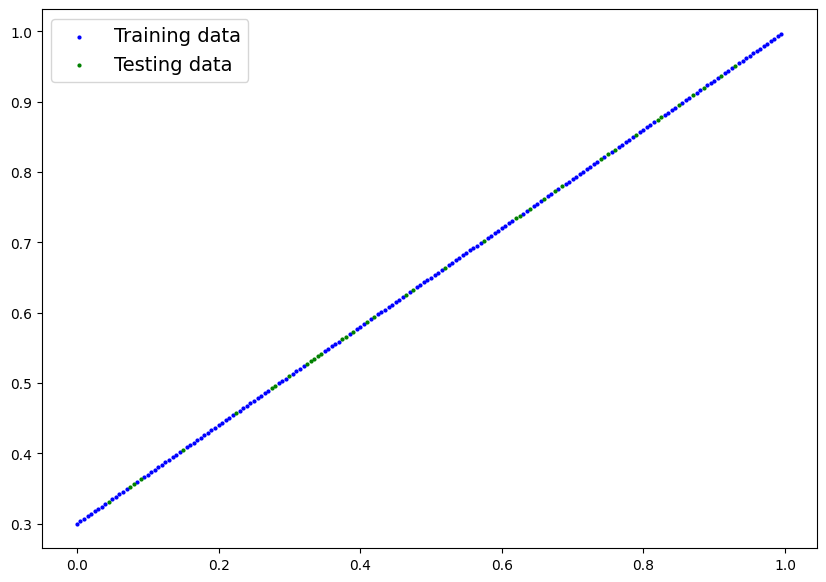

In [57]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression);

In [58]:
model_CR2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1))

model_CR2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [59]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_CR2.parameters(), lr=0.01)

In [60]:
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
    y_pred = model_CR2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_CR2.eval()
    with torch.inference_mode():
      test_pred = model_CR2(X_test_regression)
      test_loss = loss_fn(test_pred, y_test_regression)

    # Printing each 100
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.79882, Test loss: 0.76253
Epoch: 100 | Train loss: 0.01062, Test loss: 0.02758
Epoch: 200 | Train loss: 0.01457, Test loss: 0.02505
Epoch: 300 | Train loss: 0.01398, Test loss: 0.02288
Epoch: 400 | Train loss: 0.01378, Test loss: 0.02277
Epoch: 500 | Train loss: 0.01386, Test loss: 0.02298
Epoch: 600 | Train loss: 0.01334, Test loss: 0.02268
Epoch: 700 | Train loss: 0.01335, Test loss: 0.02190
Epoch: 800 | Train loss: 0.01269, Test loss: 0.02023
Epoch: 900 | Train loss: 0.01245, Test loss: 0.02138


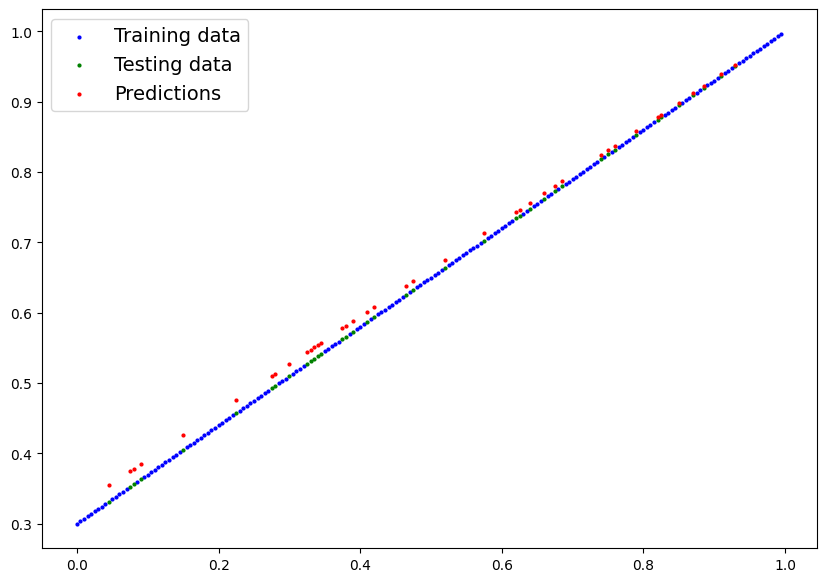

In [61]:
model_CR2.eval()
with torch.inference_mode():
    y_preds = model_CR2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)

In [62]:
##Working on new data

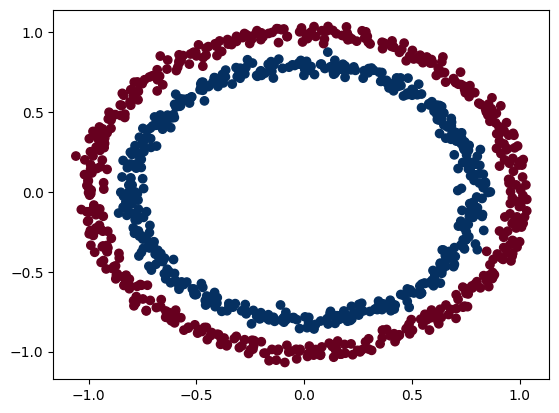

In [63]:
n_samples = 1000
X, y = make_circles(n_samples=1000,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [64]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state=42)

In [65]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [66]:
#Now working on Non Linearity

In [67]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_CR3 = CircleModelV2()
print(model_CR3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [68]:
#loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_CR3.parameters(), lr=0.1)

In [69]:
torch.manual_seed(42)
epochs=1000

X_train, y_train = X_train, y_train
X_test, y_test = X_test, y_test

for epoch in range(epochs):
    y_logits = model_CR3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_CR3.eval()
    with torch.inference_mode():
      test_logits = model_CR3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
        
      #loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)
    if epoch % 50 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 50 | Loss: 0.69181, Accuracy: 58.25% | Test Loss: 0.69177, Test Accuracy: 58.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 150 | Loss: 0.69050, Accuracy: 52.88% | Test Loss: 0.69027, Test Accuracy: 55.00%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 250 | Loss: 0.68894, Accuracy: 53.50% | Test Loss: 0.68840, Test Accuracy: 56.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 350 | Loss: 0.68676, Accuracy: 52.62% | Test Loss: 0.68587, Test Accuracy: 56.50%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 450 | Loss: 0.68326, Accuracy: 52.75% | Test Loss: 0.68198, Test Accuracy: 56.00%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 550 | Loss: 0.678

In [70]:
# Make predictions
model_CR3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_CR3(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

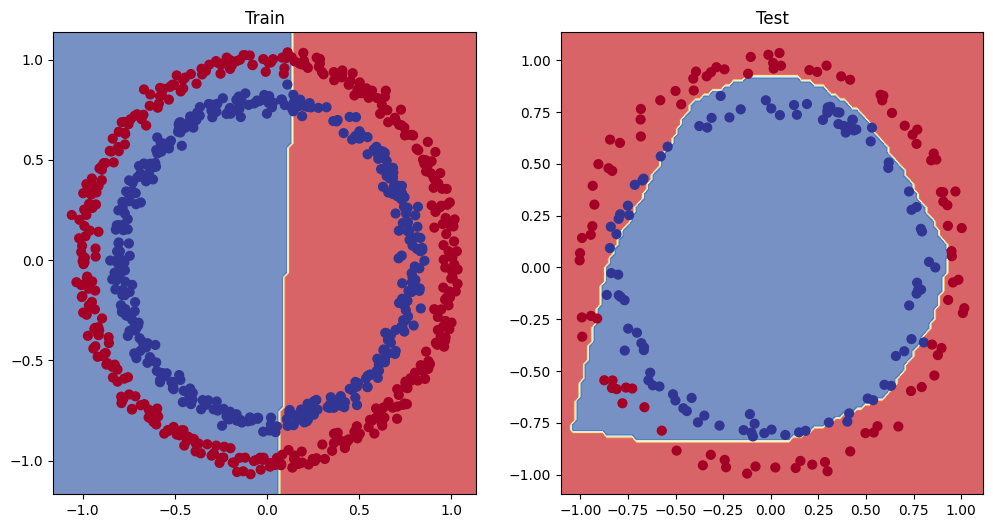

In [71]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_CR1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_CR3, X_test, y_test) # model_3 = has non-linearity

In [72]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A


tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

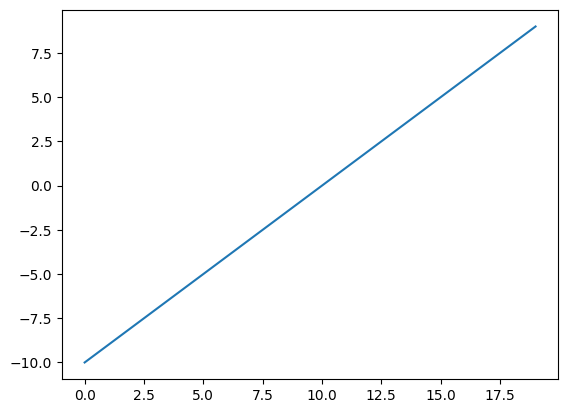

In [73]:
plt.plot(A)

In [74]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

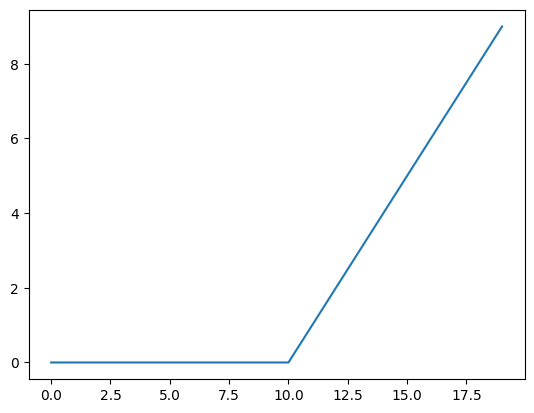

In [75]:
plt.plot(relu(A))

In [76]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

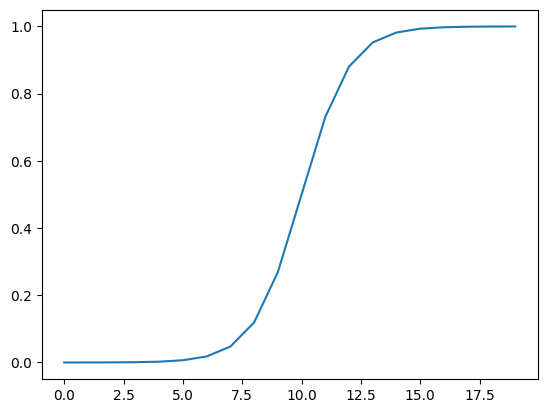

In [77]:
plt.plot(sigmoid(A))